In [2]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

dir_result = "./results_emd/noise_compare/"
#dir_result = "results/noise_compare/"

columns = ["H","X1B","X2B","X3B","wRC"]


C:\ProgramData\Anaconda3\envs\semantic_data_lake\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\envs\semantic_data_lake\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\envs\semantic_data_lake\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\envs\semantic_data_lake\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


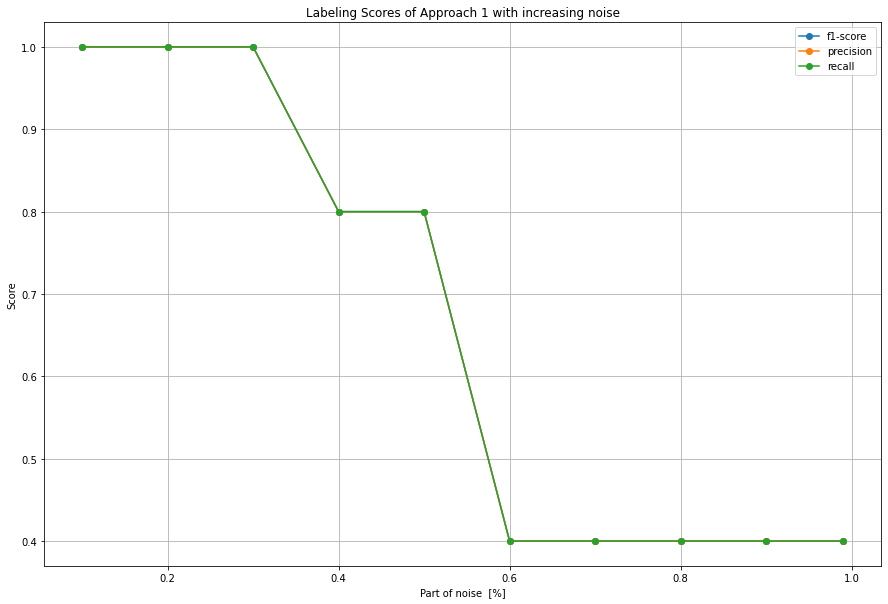

In [6]:
noise_array = []
over_all_f1_score = []
over_all_precision = []
over_all_recall = []

for noise in np.round(np.arange(0,1,0.01), decimals=2):
    try:
        result = pickle.load(open(dir_result+"appro1_noise"+f"{noise}"+"_mgrc0.p", "rb"))
        #print(result)
        noise_array.append(noise)
        over_all_f1_score.append(result["weighted avg"]["f1-score"])
        over_all_precision.append(result["weighted avg"]["precision"])
        over_all_recall.append(result["weighted avg"]["recall"])
    except:
        None


plt.figure(figsize=(15,10))
plt.plot(noise_array, over_all_f1_score, label="f1-score", marker="o")
plt.plot(noise_array, over_all_precision, label="precision", marker="o")
plt.plot(noise_array, over_all_recall, label="recall", marker="o")
plt.xlabel("Part of noise  [%]")
plt.ylabel("Score")
plt.title("Labeling Scores of Approach 1 with increasing noise")
plt.grid()
plt.legend()
plt.show()

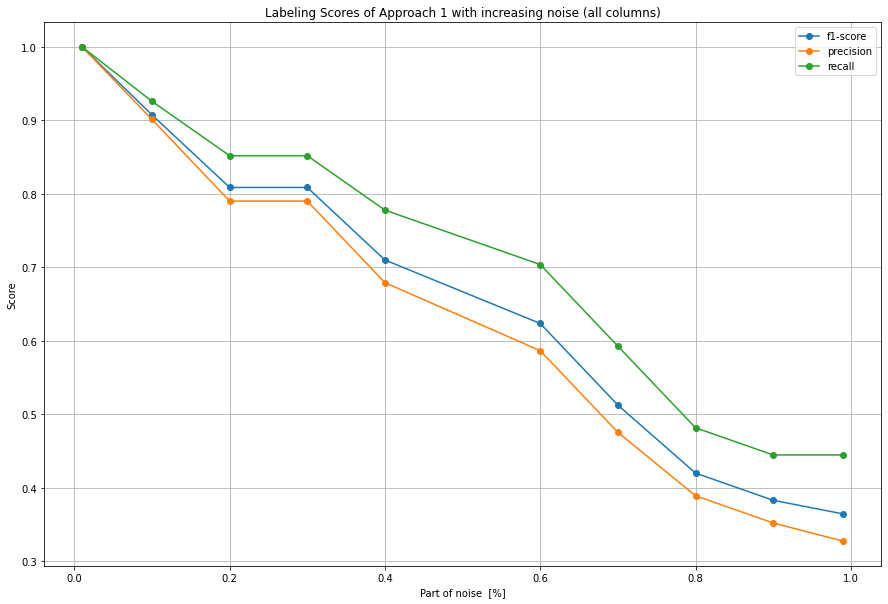

In [16]:
noise_array = []
over_all_f1_score = []
over_all_precision = []
over_all_recall = []

for noise in np.round(np.arange(0,1,0.01), decimals=2):
    try:
        result = pickle.load(open(dir_result+"appro1_noise"+f"{noise}"+"_mgrc0_all_columns.p", "rb"))
        #print(result)
        noise_array.append(noise)
        over_all_f1_score.append(result["weighted avg"]["f1-score"])
        over_all_precision.append(result["weighted avg"]["precision"])
        over_all_recall.append(result["weighted avg"]["recall"])
    except:
        None


plt.figure(figsize=(15,10))
plt.plot(noise_array, over_all_f1_score, label="f1-score", marker="o")
plt.plot(noise_array, over_all_precision, label="precision", marker="o")
plt.plot(noise_array, over_all_recall, label="recall", marker="o")
plt.xlabel("Part of noise  [%]")
plt.ylabel("Score")
plt.title("Labeling Scores of Approach 1 with increasing noise (all columns)")
plt.grid()
plt.legend()
plt.show()

# Approach 3

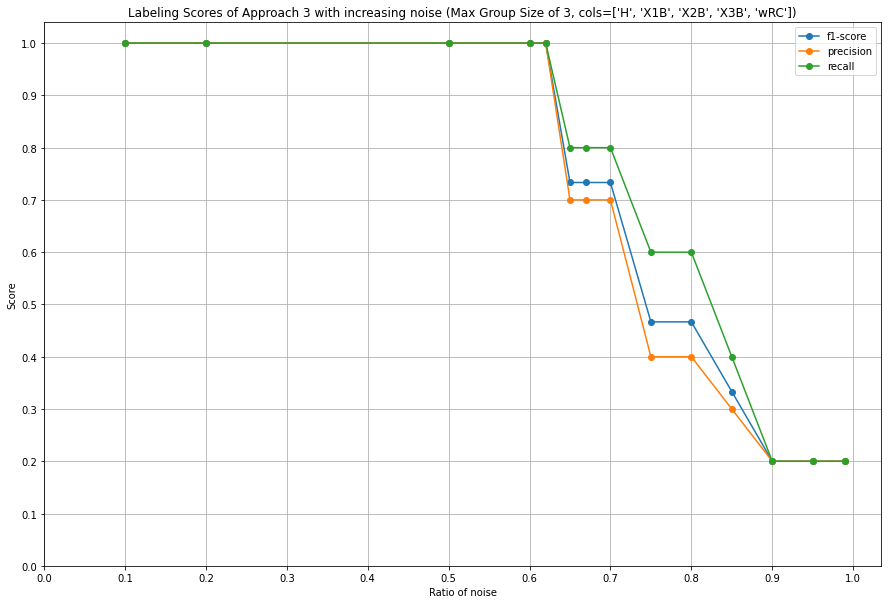

In [28]:
noise_array = []
over_all_f1_score = []
over_all_precision = []
over_all_recall = []

for noise in np.round(np.arange(0,1,0.01), decimals=2):
    try:
        result = pickle.load(open(dir_result+"appro3_noise"+f"{noise}"+"_mgrc3.p", "rb"))
        #print(result)
        noise_array.append(noise)
        over_all_f1_score.append(result["weighted avg"]["f1-score"])
        over_all_precision.append(result["weighted avg"]["precision"])
        over_all_recall.append(result["weighted avg"]["recall"])
    except:
        None


plt.figure(figsize=(15,10))
plt.plot(noise_array, over_all_f1_score, label="f1-score", marker="o")
plt.plot(noise_array, over_all_precision, label="precision", marker="o")
plt.plot(noise_array, over_all_recall, label="recall", marker="o")
plt.xlabel("Ratio of noise")
plt.ylabel("Score")
plt.xticks(np.round(np.arange(0,1.1,0.1), decimals=2))
plt.yticks(np.arange(0,1.1,.1))
plt.title(f"Labeling Scores of Approach 3 with increasing noise (Max Group Size of 3, cols={columns})")
plt.grid()
plt.legend()
plt.show()

In [3]:
# read the label results in
import json
from sklearn.metrics import classification_report
import pickle

os.environ["WORKING_DIR"] = "D:\\semantic_data_lake\\semantic_data_lake\\"

# do classifiaction report 
from glob import glob

noise = 0.9
for noise in np.around(np.arange(0.01,1,0.01), decimals=2):
    true_labels = []
    predicted_labels = []
    for file in glob(os.path.join(os.environ.get("WORKING_DIR"),"results", "noise_compare","appro3",f"appro3_noise{noise}*")):
        with open(file) as f:
            data = json.load(f)
        true_labels.append(data["true_labels"])
        predicted_labels.append(data["predicted_labels"])

    import itertools
    flatten = itertools.chain.from_iterable
    true_labels = list(flatten(true_labels))
    predicted_labels = list(flatten(predicted_labels))

    class_report = classification_report(true_labels,predicted_labels, output_dict=True)

    pickle.dump(class_report, open(f"semantic_data_lake/semantic_data_lake/results/noise_compare/appro3_noise{noise}_mgrc3_all_columns.p", "wb"))

C:\ProgramData\Anaconda3\envs\semantic_data_lake\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\semantic_data_lake\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\semantic_data_lake\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

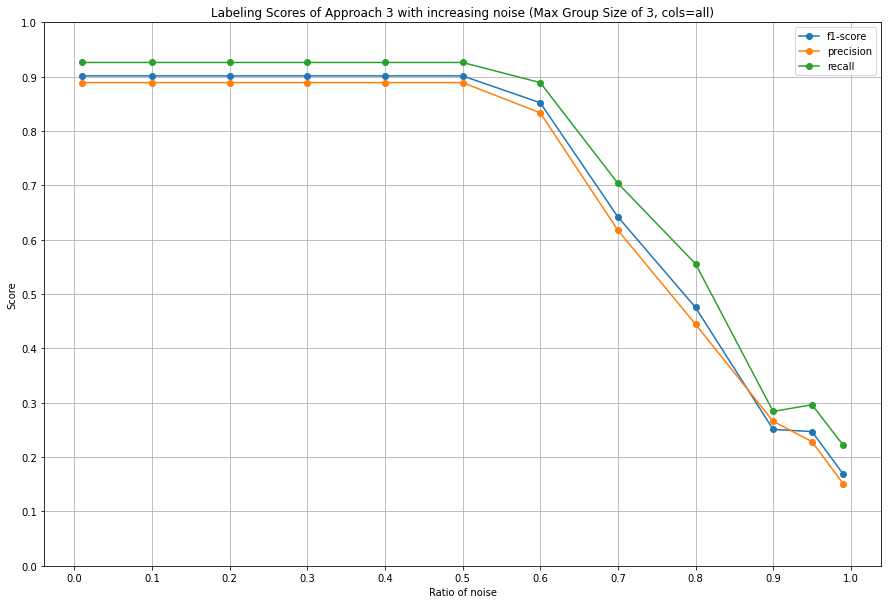

In [6]:
noise_array = []
over_all_f1_score = []
over_all_precision = []
over_all_recall = []

for noise in np.round(np.arange(0,1,0.01), decimals=2):
    try:
        result = pickle.load(open(dir_result+"appro3_noise"+f"{noise}"+"_mgrc3_all_columns.p", "rb"))
        #print(result)
        noise_array.append(noise)
        over_all_f1_score.append(result["weighted avg"]["f1-score"])
        over_all_precision.append(result["weighted avg"]["precision"])
        over_all_recall.append(result["weighted avg"]["recall"])
    except:
        None


plt.figure(figsize=(15,10))
plt.plot(noise_array, over_all_f1_score, label="f1-score", marker="o")
plt.plot(noise_array, over_all_precision, label="precision", marker="o")
plt.plot(noise_array, over_all_recall, label="recall", marker="o")
plt.xlabel("Ratio of noise")
plt.ylabel("Score")
plt.xticks(np.round(np.arange(0,1.1,0.1), decimals=2))
plt.yticks(np.arange(0,1.1,.1))
plt.title(f"Labeling Scores of Approach 3 with increasing noise (Max Group Size of 3, cols=all)")
plt.grid()
plt.legend()
plt.show()

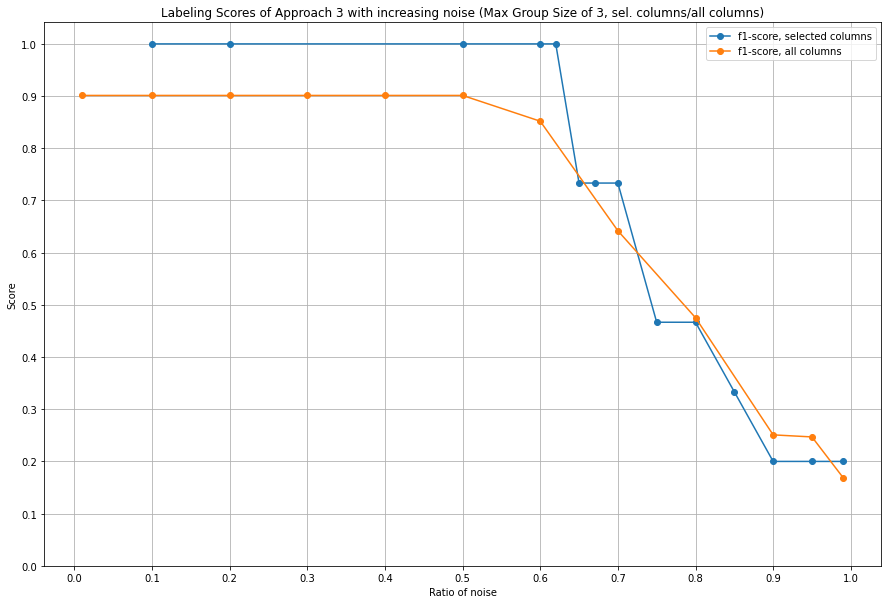

In [11]:
# compoare diff columns sizes
noise_array = []
noise_array_1 = []
over_all_f1_score = []
over_all_precision = []
over_all_recall = []
over_all_f1_score_1 = []
over_all_precision_1 = []
over_all_recall_1 = []

for noise in np.round(np.arange(0,1,0.01), decimals=2):
    try:
        result = pickle.load(open(dir_result+"appro3_noise"+f"{noise}"+"_mgrc3.p", "rb"))
        over_all_f1_score.append(result["weighted avg"]["f1-score"])
        over_all_precision.append(result["weighted avg"]["precision"])
        over_all_recall.append(result["weighted avg"]["recall"])
        noise_array.append(noise)
    except:
        None
    try:
        result1 = pickle.load(open(dir_result+"appro3_noise"+f"{noise}"+"_mgrc3_all_columns.p", "rb"))
        noise_array_1.append(noise)
        over_all_f1_score_1.append(result1["weighted avg"]["f1-score"])
        over_all_precision_1.append(result1["weighted avg"]["precision"])
        over_all_recall_1.append(result1["weighted avg"]["recall"])
    except:
        None


plt.figure(figsize=(15,10))
plt.plot(noise_array, over_all_f1_score, label="f1-score, selected columns", marker="o")
plt.plot(noise_array_1, over_all_f1_score_1, label="f1-score, all columns", marker="o")
#plt.plot(noise_array, over_all_precision, label="precision", marker="o")
#plt.plot(noise_array, over_all_recall, label="recall", marker="o")
plt.xlabel("Ratio of noise")
plt.ylabel("Score")
plt.title("Labeling Scores of Approach 3 with increasing noise (Max Group Size of 3, sel. columns/all columns)")
plt.xticks(np.round(np.arange(0,1.1,0.1), decimals=2))
plt.yticks(np.arange(0,1.1,.1))
plt.grid()
plt.legend()
plt.show()

In [22]:
over_all_f1_score

[]

# Approach 4

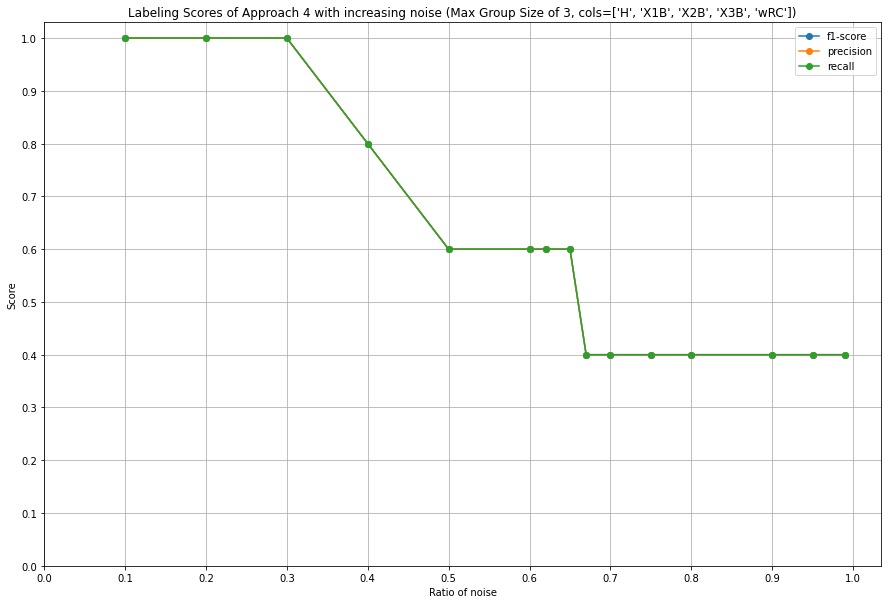

In [30]:
# selected columns
noise_array = []
over_all_f1_score = []
over_all_precision = []
over_all_recall = []

for noise in np.round(np.arange(0,1,0.01), decimals=2):
    try:
        result = pickle.load(open(dir_result+"appro4_noise"+f"{noise}"+"_mgrc3.p", "rb"))
        #print(result)
        noise_array.append(noise)
        over_all_f1_score.append(result["weighted avg"]["f1-score"])
        over_all_precision.append(result["weighted avg"]["precision"])
        over_all_recall.append(result["weighted avg"]["recall"])
    except:
        None


plt.figure(figsize=(15,10))
plt.plot(noise_array, over_all_f1_score, label="f1-score", marker="o")
plt.plot(noise_array, over_all_precision, label="precision", marker="o")
plt.plot(noise_array, over_all_recall, label="recall", marker="o")
plt.xlabel("Ratio of noise")
plt.ylabel("Score")
plt.title(f"Labeling Scores of Approach 4 with increasing noise (Max Group Size of 3, cols={columns})")
plt.xticks(np.round(np.arange(0,1.1,0.1), decimals=2))
plt.yticks(np.arange(0,1.1,.1))
plt.grid()
plt.legend()
plt.show()

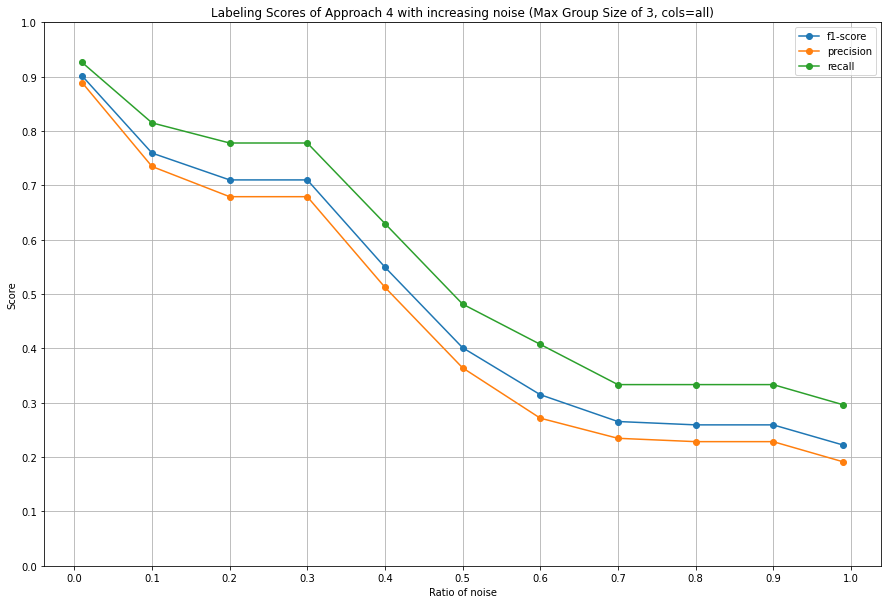

In [31]:
# all columns
noise_array = []
over_all_f1_score = []
over_all_precision = []
over_all_recall = []

for noise in np.round(np.arange(0,1,0.01), decimals=2):
    try:
        result = pickle.load(open(dir_result+"appro4_noise"+f"{noise}"+"_mgrc3_all_columns.p", "rb"))
        #print(result)
        noise_array.append(noise)
        over_all_f1_score.append(result["weighted avg"]["f1-score"])
        over_all_precision.append(result["weighted avg"]["precision"])
        over_all_recall.append(result["weighted avg"]["recall"])
    except:
        None


plt.figure(figsize=(15,10))
plt.plot(noise_array, over_all_f1_score, label="f1-score", marker="o")
plt.plot(noise_array, over_all_precision, label="precision", marker="o")
plt.plot(noise_array, over_all_recall, label="recall", marker="o")
plt.xlabel("Ratio of noise")
plt.ylabel("Score")
plt.title(f"Labeling Scores of Approach 4 with increasing noise (Max Group Size of 3, cols=all)")
plt.xticks(np.round(np.arange(0,1.1,0.1), decimals=2))
plt.yticks(np.arange(0,1.1,.1))
plt.grid()
plt.legend()
plt.show()

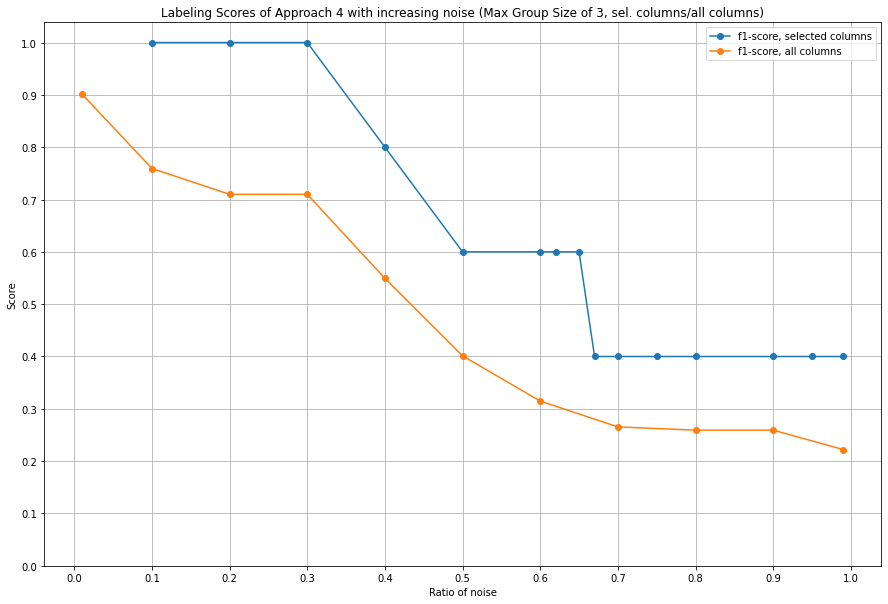

In [40]:
# compoare diff columns sizes
noise_array = []
noise_array_1 = []
over_all_f1_score = []
over_all_precision = []
over_all_recall = []
over_all_f1_score_1 = []
over_all_precision_1 = []
over_all_recall_1 = []

for noise in np.round(np.arange(0,1,0.01), decimals=2):
    try:
        result = pickle.load(open(dir_result+"appro4_noise"+f"{noise}"+"_mgrc3.p", "rb"))
        over_all_f1_score.append(result["weighted avg"]["f1-score"])
        over_all_precision.append(result["weighted avg"]["precision"])
        over_all_recall.append(result["weighted avg"]["recall"])
        noise_array.append(noise)
    except:
        None
    try:
        result1 = pickle.load(open(dir_result+"appro4_noise"+f"{noise}"+"_mgrc3_all_columns.p", "rb"))
        noise_array_1.append(noise)
        over_all_f1_score_1.append(result1["weighted avg"]["f1-score"])
        over_all_precision_1.append(result1["weighted avg"]["precision"])
        over_all_recall_1.append(result1["weighted avg"]["recall"])
    except:
        None


plt.figure(figsize=(15,10))
plt.plot(noise_array, over_all_f1_score, label="f1-score, selected columns", marker="o")
plt.plot(noise_array_1, over_all_f1_score_1, label="f1-score, all columns", marker="o")
#plt.plot(noise_array, over_all_precision, label="precision", marker="o")
#plt.plot(noise_array, over_all_recall, label="recall", marker="o")
plt.xlabel("Ratio of noise")
plt.ylabel("Score")
plt.title("Labeling Scores of Approach 4 with increasing noise (Max Group Size of 3, sel. columns/all columns)")
plt.xticks(np.round(np.arange(0,1.1,0.1), decimals=2))
plt.yticks(np.arange(0,1.1,.1))
plt.grid()
plt.legend()
plt.show()

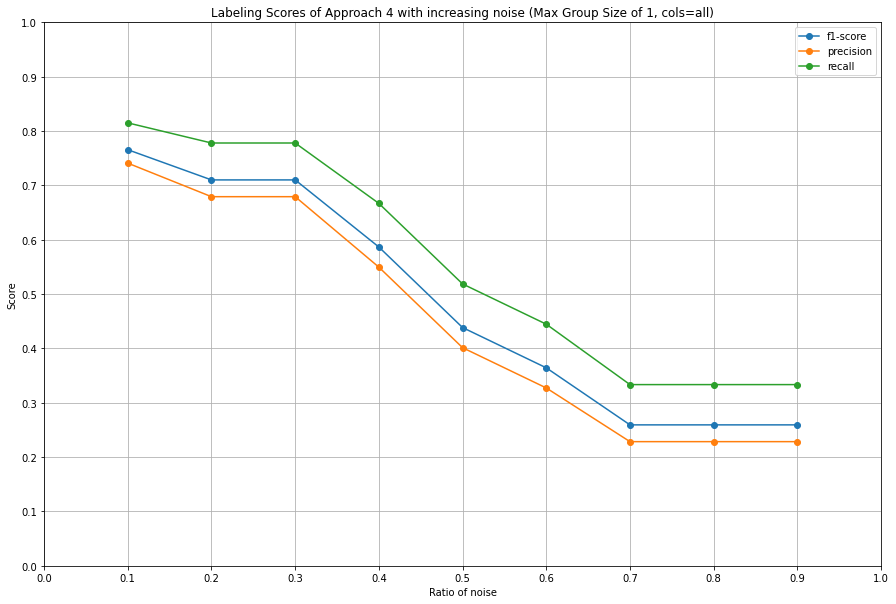

In [36]:
# all columns / mgrc 1
noise_array = []
over_all_f1_score = []
over_all_precision = []
over_all_recall = []

for noise in np.round(np.arange(0,1,0.01), decimals=2):
    try:
        result = pickle.load(open(dir_result+"appro4_noise"+f"{noise}"+"_mgrc1_all_columns.p", "rb"))
        #print(result)
        noise_array.append(noise)
        over_all_f1_score.append(result["weighted avg"]["f1-score"])
        over_all_precision.append(result["weighted avg"]["precision"])
        over_all_recall.append(result["weighted avg"]["recall"])
    except:
        None


plt.figure(figsize=(15,10))
plt.plot(noise_array, over_all_f1_score, label="f1-score", marker="o")
plt.plot(noise_array, over_all_precision, label="precision", marker="o")
plt.plot(noise_array, over_all_recall, label="recall", marker="o")
plt.xlabel("Ratio of noise")
plt.ylabel("Score")
plt.title(f"Labeling Scores of Approach 4 with increasing noise (Max Group Size of 1, cols=all)")
plt.xticks(np.round(np.arange(0,1.1,0.1), decimals=2))
plt.yticks(np.arange(0,1.1,.1))
plt.grid()
plt.legend()
plt.show()

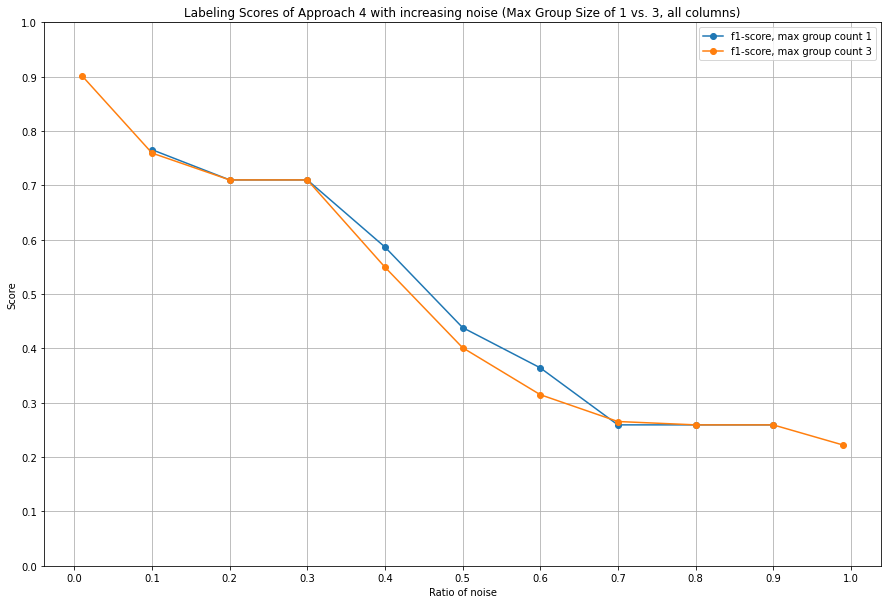

In [41]:
# all columns / mgr 1 vs. 3
noise_array = []
noise_array_1 = []
over_all_f1_score = []
over_all_precision = []
over_all_recall = []
over_all_f1_score_1 = []
over_all_precision_1 = []
over_all_recall_1 = []

for noise in np.round(np.arange(0,1,0.01), decimals=2):
    try:
        result = pickle.load(open(dir_result+"appro4_noise"+f"{noise}"+"_mgrc1_all_columns.p", "rb"))
        over_all_f1_score.append(result["weighted avg"]["f1-score"])
        over_all_precision.append(result["weighted avg"]["precision"])
        over_all_recall.append(result["weighted avg"]["recall"])
        noise_array.append(noise)
    except:
        None
    try:
        result1 = pickle.load(open(dir_result+"appro4_noise"+f"{noise}"+"_mgrc3_all_columns.p", "rb"))
        noise_array_1.append(noise)
        over_all_f1_score_1.append(result1["weighted avg"]["f1-score"])
        over_all_precision_1.append(result1["weighted avg"]["precision"])
        over_all_recall_1.append(result1["weighted avg"]["recall"])
    except:
        None


plt.figure(figsize=(15,10))
plt.plot(noise_array, over_all_f1_score, label="f1-score, max group count 1", marker="o")
plt.plot(noise_array_1, over_all_f1_score_1, label="f1-score, max group count 3", marker="o")
#plt.plot(noise_array, over_all_precision, label="precision", marker="o")
#plt.plot(noise_array, over_all_recall, label="recall", marker="o")
plt.xlabel("Ratio of noise")
plt.ylabel("Score")
plt.title("Labeling Scores of Approach 4 with increasing noise (Max Group Size of 1 vs. 3, all columns)")
plt.xticks(np.round(np.arange(0,1.1,0.1), decimals=2))
plt.yticks(np.arange(0,1.1,.1))
plt.grid()
plt.legend()
plt.show()


# Appr. 3 vs. Appr.4 

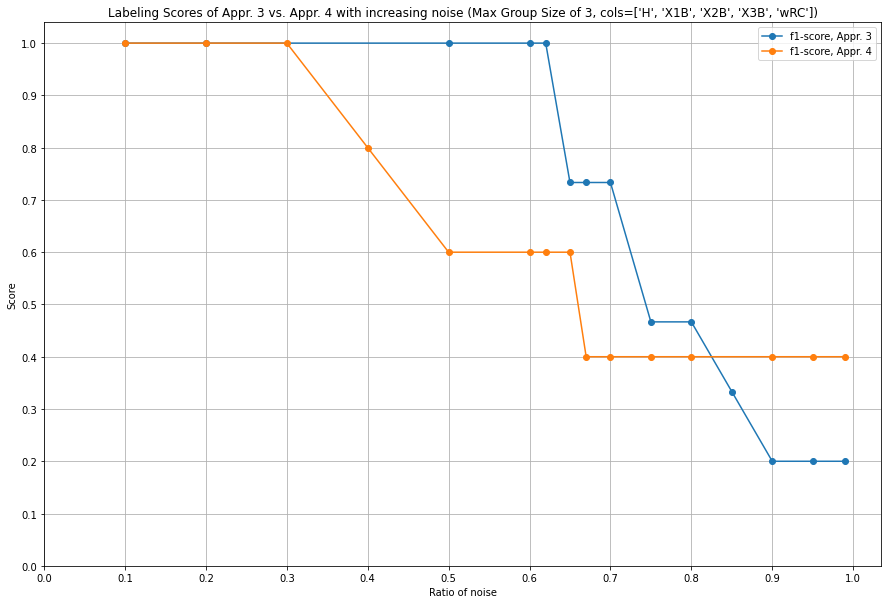

In [8]:
# all columns / mgr 1 vs. 3
noise_array = []
noise_array_1 = []
over_all_f1_score = []
over_all_precision = []
over_all_recall = []
over_all_f1_score_1 = []
over_all_precision_1 = []
over_all_recall_1 = []

for noise in np.round(np.arange(0,1,0.01), decimals=2):
    try:
        result = pickle.load(open(dir_result+"appro3_noise"+f"{noise}"+"_mgrc3.p", "rb"))
        over_all_f1_score.append(result["weighted avg"]["f1-score"])
        over_all_precision.append(result["weighted avg"]["precision"])
        over_all_recall.append(result["weighted avg"]["recall"])
        noise_array.append(noise)
    except:
        None
    try:
        result1 = pickle.load(open(dir_result+"appro4_noise"+f"{noise}"+"_mgrc3.p", "rb"))
        noise_array_1.append(noise)
        over_all_f1_score_1.append(result1["weighted avg"]["f1-score"])
        over_all_precision_1.append(result1["weighted avg"]["precision"])
        over_all_recall_1.append(result1["weighted avg"]["recall"])
    except:
        None


plt.figure(figsize=(15,10))
plt.plot(noise_array, over_all_f1_score, label="f1-score, Appr. 3", marker="o")
plt.plot(noise_array_1, over_all_f1_score_1, label="f1-score, Appr. 4", marker="o")
#plt.plot(noise_array, over_all_precision, label="precision", marker="o")
#plt.plot(noise_array, over_all_recall, label="recall", marker="o")
plt.xlabel("Ratio of noise")
plt.ylabel("Score")
plt.title(f"Labeling Scores of Appr. 3 vs. Appr. 4 with increasing noise (Max Group Size of 3, cols={columns})")
plt.xticks(np.round(np.arange(0,1.1,0.1), decimals=2))
plt.yticks(np.arange(0,1.1,.1))
plt.grid()
plt.legend()
plt.show()

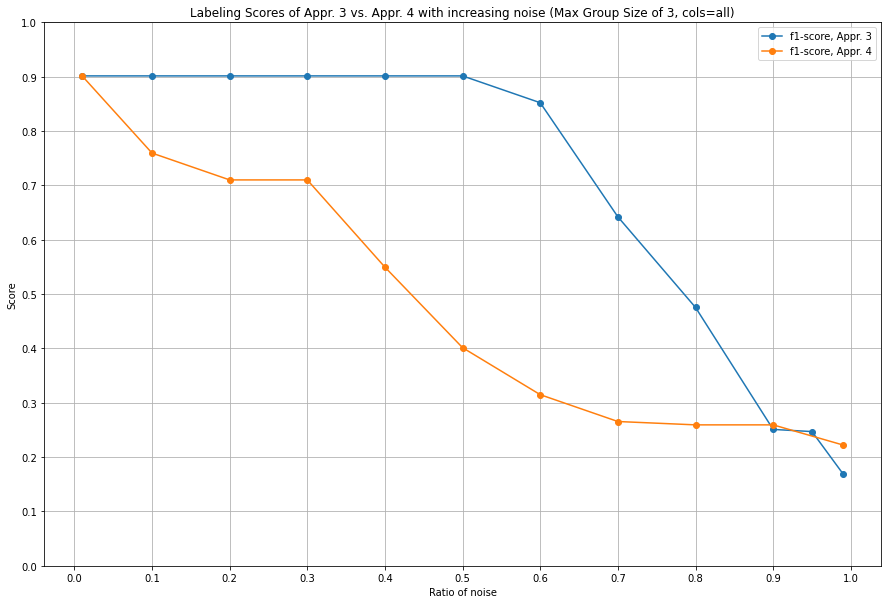

In [9]:
# all columns / mgr 1 vs. 3
noise_array = []
noise_array_1 = []
over_all_f1_score = []
over_all_precision = []
over_all_recall = []
over_all_f1_score_1 = []
over_all_precision_1 = []
over_all_recall_1 = []

for noise in np.round(np.arange(0,1,0.01), decimals=2):
    try:
        result = pickle.load(open(dir_result+"appro3_noise"+f"{noise}"+"_mgrc3_all_columns.p", "rb"))
        over_all_f1_score.append(result["weighted avg"]["f1-score"])
        over_all_precision.append(result["weighted avg"]["precision"])
        over_all_recall.append(result["weighted avg"]["recall"])
        noise_array.append(noise)
    except:
        None
    try:
        result1 = pickle.load(open(dir_result+"appro4_noise"+f"{noise}"+"_mgrc3_all_columns.p", "rb"))
        noise_array_1.append(noise)
        over_all_f1_score_1.append(result1["weighted avg"]["f1-score"])
        over_all_precision_1.append(result1["weighted avg"]["precision"])
        over_all_recall_1.append(result1["weighted avg"]["recall"])
    except:
        None


plt.figure(figsize=(15,10))
plt.plot(noise_array, over_all_f1_score, label="f1-score, Appr. 3", marker="o")
plt.plot(noise_array_1, over_all_f1_score_1, label="f1-score, Appr. 4", marker="o")
#plt.plot(noise_array, over_all_precision, label="precision", marker="o")
#plt.plot(noise_array, over_all_recall, label="recall", marker="o")
plt.xlabel("Ratio of noise")
plt.ylabel("Score")
plt.title(f"Labeling Scores of Appr. 3 vs. Appr. 4 with increasing noise (Max Group Size of 3, cols=all)")
plt.xticks(np.round(np.arange(0,1.1,0.1), decimals=2))
plt.yticks(np.arange(0,1.1,.1))
plt.grid()
plt.legend()
plt.show()

# Approach 0

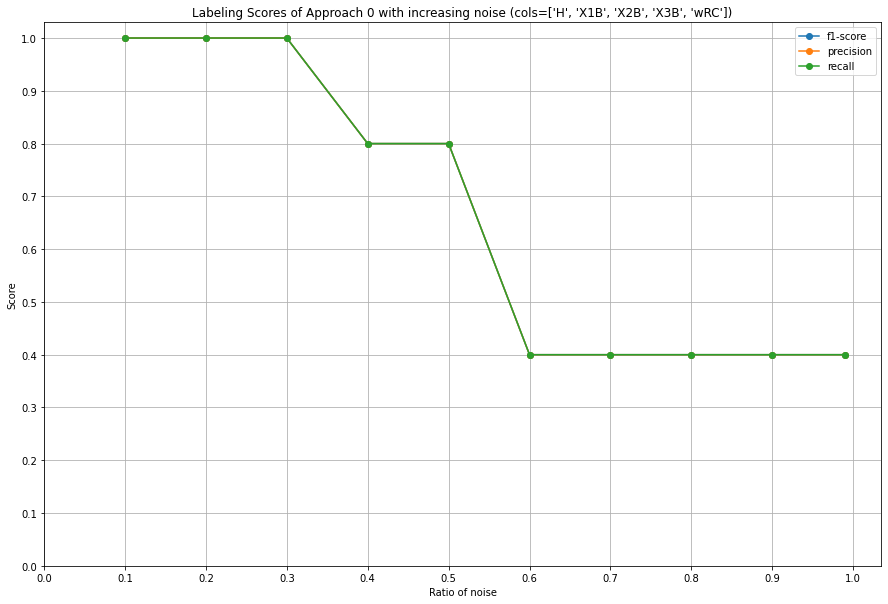

In [43]:
# selected columns
noise_array = []
over_all_f1_score = []
over_all_precision = []
over_all_recall = []

for noise in np.round(np.arange(0,1,0.01), decimals=2):
    try:
        result = pickle.load(open(dir_result+"appro1_noise"+f"{noise}"+"_mgrc0.p", "rb"))
        #print(result)
        noise_array.append(noise)
        over_all_f1_score.append(result["weighted avg"]["f1-score"])
        over_all_precision.append(result["weighted avg"]["precision"])
        over_all_recall.append(result["weighted avg"]["recall"])
    except:
        None


plt.figure(figsize=(15,10))
plt.plot(noise_array, over_all_f1_score, label="f1-score", marker="o")
plt.plot(noise_array, over_all_precision, label="precision", marker="o")
plt.plot(noise_array, over_all_recall, label="recall", marker="o")
plt.xlabel("Ratio of noise")
plt.ylabel("Score")
plt.title(f"Labeling Scores of Approach 0 with increasing noise (cols={columns})")
plt.xticks(np.round(np.arange(0,1.1,0.1), decimals=2))
plt.yticks(np.arange(0,1.1,.1))
plt.grid()
plt.legend()
plt.show()

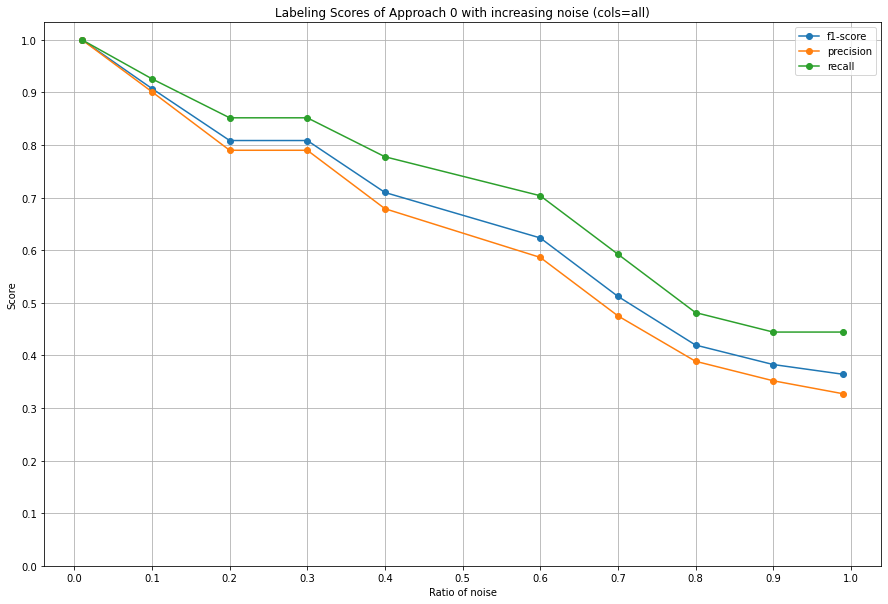

In [45]:
# all columns
noise_array = []
over_all_f1_score = []
over_all_precision = []
over_all_recall = []

for noise in np.round(np.arange(0,1,0.01), decimals=2):
    try:
        result = pickle.load(open(dir_result+"appro1_noise"+f"{noise}"+"_mgrc0_all_columns.p", "rb"))
        #print(result)
        noise_array.append(noise)
        over_all_f1_score.append(result["weighted avg"]["f1-score"])
        over_all_precision.append(result["weighted avg"]["precision"])
        over_all_recall.append(result["weighted avg"]["recall"])
    except:
        None


plt.figure(figsize=(15,10))
plt.plot(noise_array, over_all_f1_score, label="f1-score", marker="o")
plt.plot(noise_array, over_all_precision, label="precision", marker="o")
plt.plot(noise_array, over_all_recall, label="recall", marker="o")
plt.xlabel("Ratio of noise")
plt.ylabel("Score")
plt.title(f"Labeling Scores of Approach 0 with increasing noise (cols=all)")
plt.xticks(np.round(np.arange(0,1.1,0.1), decimals=2))
plt.yticks(np.arange(0,1.1,.1))
plt.grid()
plt.legend()
plt.show()

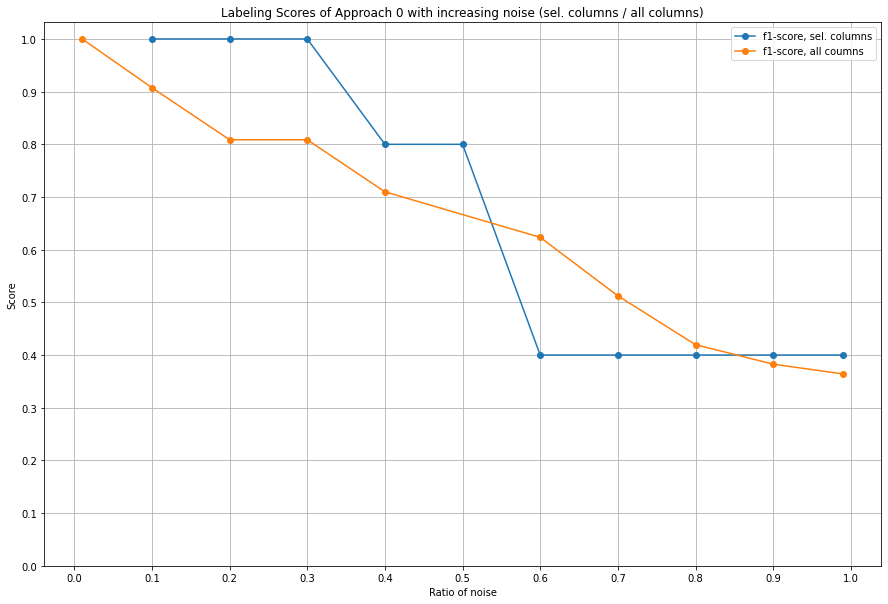

In [3]:
# sel columns / all columns
noise_array = []
noise_array_1 = []
over_all_f1_score = []
over_all_precision = []
over_all_recall = []
over_all_f1_score_1 = []
over_all_precision_1 = []
over_all_recall_1 = []

for noise in np.round(np.arange(0,1,0.01), decimals=2):
    try:
        result = pickle.load(open(dir_result+"appro1_noise"+f"{noise}"+"_mgrc0.p", "rb"))
        over_all_f1_score.append(result["weighted avg"]["f1-score"])
        over_all_precision.append(result["weighted avg"]["precision"])
        over_all_recall.append(result["weighted avg"]["recall"])
        noise_array.append(noise)
    except:
        None
    try:
        result1 = pickle.load(open(dir_result+"appro1_noise"+f"{noise}"+"_mgrc0_all_columns.p", "rb"))
        noise_array_1.append(noise)
        over_all_f1_score_1.append(result1["weighted avg"]["f1-score"])
        over_all_precision_1.append(result1["weighted avg"]["precision"])
        over_all_recall_1.append(result1["weighted avg"]["recall"])
    except:
        None


plt.figure(figsize=(15,10))
plt.plot(noise_array, over_all_f1_score, label="f1-score, sel. columns", marker="o")
plt.plot(noise_array_1, over_all_f1_score_1, label="f1-score, all coumns", marker="o")
#plt.plot(noise_array, over_all_precision, label="precision", marker="o")
#plt.plot(noise_array, over_all_recall, label="recall", marker="o")
plt.xlabel("Ratio of noise")
plt.ylabel("Score")
plt.title(f"Labeling Scores of Approach 0 with increasing noise (sel. columns / all columns)")
plt.xticks(np.round(np.arange(0,1.1,0.1), decimals=2))
plt.yticks(np.arange(0,1.1,.1))
plt.grid()
plt.legend()
plt.show()

# Appr. 0 vs. Appr. 3 vs. Appr. 4

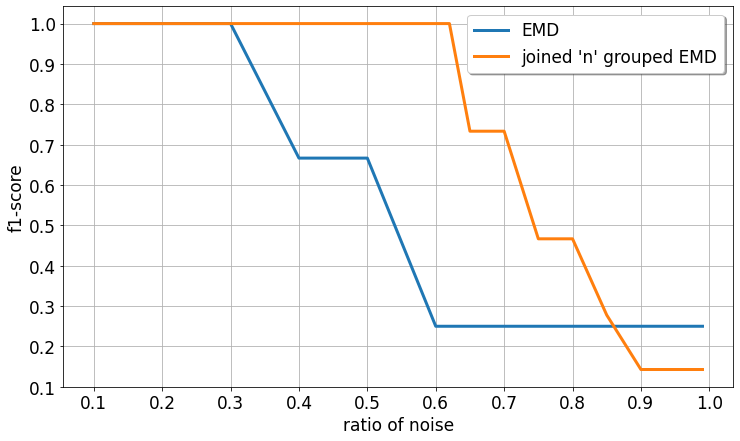

In [8]:
# sel columns / all columns
noise_array = []
noise_array_1 = []
noise_array_2 = []
over_all_f1_score = []
over_all_f1_score_macro = []
over_all_precision = []
over_all_recall = []
over_all_accuracy = []
over_all_f1_score_1 = []
over_all_f1_score_1_macro = []
over_all_precision_1 = []
over_all_recall_1 = []
over_all_accuracy_1 = []
over_all_f1_score_2 = []
over_all_f1_score_2_macro = []
over_all_precision_2 = []
over_all_recall_2 = []
over_all_accuracy_2 = []


for noise in np.round(np.arange(0,1.02,0.01), decimals=2):
    try:
        result = pickle.load(open(dir_result+"appro1_noise"+f"{noise}"+"_mgrc0.p", "rb"))
        over_all_f1_score.append(result["weighted avg"]["f1-score"])
        over_all_f1_score_macro.append(result["macro avg"]["f1-score"])
        over_all_precision.append(result["weighted avg"]["precision"])
        over_all_recall.append(result["weighted avg"]["recall"])
        over_all_accuracy.append(result["accuracy"])
        noise_array.append(noise)
    except:
        None
    try:
        result1 = pickle.load(open(dir_result+"appro3_noise"+f"{noise}"+"_mgrc3.p", "rb"))
        noise_array_1.append(noise)
        over_all_f1_score_1.append(result1["weighted avg"]["f1-score"])
        over_all_f1_score_1_macro.append(result1["macro avg"]["f1-score"])
        over_all_precision_1.append(result1["weighted avg"]["precision"])
        over_all_recall_1.append(result1["weighted avg"]["recall"])
        over_all_accuracy_1.append(result["accuracy"])
    except:
        None
    try:
        result2 = pickle.load(open(dir_result+"appro4_noise"+f"{noise}"+"_mgrc3.p", "rb"))
        noise_array_2.append(noise)
        over_all_f1_score_2.append(result2["weighted avg"]["f1-score"])
        over_all_f1_score_2_macro.append(result2["macro avg"]["f1-score"])
        over_all_precision_2.append(result2["weighted avg"]["precision"])
        over_all_recall_2.append(result2["weighted avg"]["recall"])
        over_all_accuracy_2.append(result["accuracy"])
    except:
        None


plt.figure(figsize=(12,7))
# plt.plot(noise_array, over_all_f1_score, label="EMD (weighted)", linewidth=3)
# plt.plot(noise_array_1, over_all_f1_score_1, label="joined 'n' grouped EMD (weighted)", linewidth=3)
#plt.plot(noise_array_2, over_all_f1_score_2, label="f1-score, Appr. 4", marker="o")

plt.plot(noise_array, over_all_f1_score_macro, label="EMD", color="C0", linewidth=3)
plt.plot(noise_array_1, over_all_f1_score_1_macro, label="joined 'n' grouped EMD", color="C1", linewidth=3)
#plt.plot(noise_array_2, over_all_f1_score_2_macro, label="f1-score, Appr. 4", marker="o", color="C2", linestyle="dotted")

# plt.plot(noise_array, over_all_accuracy, label="EMD (macro)", color="C0", linewidth=3)
# plt.plot(noise_array_2, over_all_accuracy_2, label="joined 'n' grouped EMD", color="C1", linewidth=3)

# plt.plot(noise_array, over_all_precision, label="f1-score, Appr. 0", marker="o", linestyle="dotted")
# plt.plot(noise_array_1, over_all_precision_1, label="f1-score, Appr. 3", marker="o", linestyle="dotted")
# plt.plot(noise_array_2, over_all_precision_2, label="f1-score, Appr. 4", marker="o", linestyle="dotted")

# plt.plot(noise_array, over_all_recall, label="f1-score, Appr. 0", marker="o")
# plt.plot(noise_array_1, over_all_recall_1, label="f1-score, Appr. 3", marker="o")
# plt.plot(noise_array_2, over_all_recall_2, label="f1-score, Appr. 4", marker="o")


plt.xlabel("ratio of noise", fontsize=17)
plt.ylabel("f1-score", fontsize=17)
#plt.title(f"Labeling Scores of Appr. 0 vs. Appr. 3 vs. Appr. 4 with increasing noise (Max Group Size of 3, cols={columns})")
plt.title(f"")
plt.xticks(np.round(np.arange(0.1,1.1,0.1), decimals=2), fontsize=17)
plt.yticks(np.arange(0.1,1.1,.1), fontsize=17)
plt.grid()
plt.legend(fontsize=17, fancybox=True, shadow=True)
plt.savefig("./results/final_plots/numericalLabeling.png", bbox_inches='tight', dpi=100, transparent=True)
plt.show()

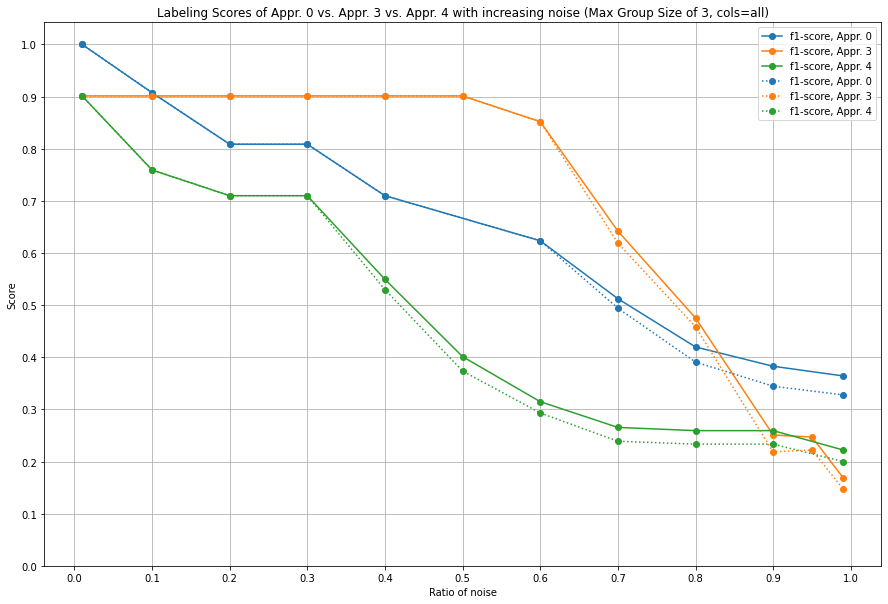

In [12]:
# sel columns / all columns
noise_array = []
noise_array_1 = []
noise_array_2 = []
over_all_f1_score = []
over_all_f1_score_macro = []
over_all_precision = []
over_all_recall = []
over_all_accuracy = []
over_all_f1_score_1 = []
over_all_f1_score_1_macro = []
over_all_precision_1 = []
over_all_recall_1 = []
over_all_accuracy_1 = []
over_all_f1_score_2 = []
over_all_f1_score_2_macro = []
over_all_precision_2 = []
over_all_recall_2 = []
over_all_accuracy_2 = []


for noise in np.round(np.arange(0,1,0.01), decimals=2):
    try:
        result = pickle.load(open(dir_result+"appro1_noise"+f"{noise}"+"_mgrc0_all_columns.p", "rb"))
        #noise_array.append(noise)
        over_all_f1_score.append(result["weighted avg"]["f1-score"])
        over_all_f1_score_macro.append(result["macro avg"]["f1-score"])
        over_all_precision.append(result["weighted avg"]["precision"])
        over_all_recall.append(result["weighted avg"]["recall"])
        over_all_accuracy.append(result["accuracy"])
        noise_array.append(noise)
    except:
        None
    try:
        result1 = pickle.load(open(dir_result+"appro3_noise"+f"{noise}"+"_mgrc3_all_columns.p", "rb"))
        noise_array_1.append(noise)
        over_all_f1_score_1.append(result1["weighted avg"]["f1-score"])
        over_all_f1_score_1_macro.append(result1["macro avg"]["f1-score"])
        over_all_precision_1.append(result1["weighted avg"]["precision"])
        over_all_recall_1.append(result1["weighted avg"]["recall"])
        over_all_accuracy_1.append(result["accuracy"])
    except:
        None
    try:
        result2 = pickle.load(open(dir_result+"appro4_noise"+f"{noise}"+"_mgrc3_all_columns.p", "rb"))
        noise_array_2.append(noise)
        over_all_f1_score_2.append(result2["weighted avg"]["f1-score"])
        over_all_f1_score_2_macro.append(result2["macro avg"]["f1-score"])
        over_all_precision_2.append(result2["weighted avg"]["precision"])
        over_all_recall_2.append(result2["weighted avg"]["recall"])
        over_all_accuracy_2.append(result["accuracy"])
    except:
        None


plt.figure(figsize=(15,10))
plt.plot(noise_array, over_all_f1_score, label="f1-score, Appr. 0", marker="o")
plt.plot(noise_array_1, over_all_f1_score_1, label="f1-score, Appr. 3", marker="o")
plt.plot(noise_array_2, over_all_f1_score_2, label="f1-score, Appr. 4", marker="o")
plt.plot(noise_array, over_all_f1_score_macro, label="f1-score, Appr. 0", marker="o", color="C0", linestyle="dotted")
plt.plot(noise_array_1, over_all_f1_score_1_macro, label="f1-score, Appr. 3", marker="o", color="C1", linestyle="dotted")
plt.plot(noise_array_2, over_all_f1_score_2_macro, label="f1-score, Appr. 4", marker="o", color="C2", linestyle="dotted")

plt.xlabel("Ratio of noise")
plt.ylabel("Score")
plt.title(f"Labeling Scores of Appr. 0 vs. Appr. 3 vs. Appr. 4 with increasing noise (Max Group Size of 3, cols=all)")
plt.xticks(np.round(np.arange(0,1.1,0.1), decimals=2))
plt.yticks(np.arange(0,1.1,.1))
plt.grid()
plt.legend()
plt.show()

In [11]:
result

{'FB': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0},
 'H': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1},
 'LD': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0},
 'SF': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0},
 'X1B': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1},
 'X2B': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1},
 'X3B': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1},
 'wRC': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1},
 'accuracy': 0.4,
 'macro avg': {'precision': 0.25,
  'recall': 0.25,
  'f1-score': 0.25,
  'support': 5},
 'weighted avg': {'precision': 0.4,
  'recall': 0.4,
  'f1-score': 0.4,
  'support': 5}}